In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("http://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv") #importing the dataset
fuel_data = pd.read_csv("http://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv") #created another version of the dataset for additional tasks

In [3]:
len(data) #checking the length of our total data

29523

In [4]:
data.isnull().sum() #this just checks how many variables have missing values

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [5]:
data['fuel_unit'].isnull().sum() #from the above code i saw that only the fuel_unit contains missing values

180

In [6]:
data.head(10)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.77,2.77,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.24,43.25,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.77,0.00,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133.0,24.840000,58.54,55.13,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520.0,24.290000,33.97,34.65,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233.0,22.484000,28.73,28.11,1.278


In [7]:
data_group = data.groupby('report_year')

In [8]:
data_group.sum().head()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
report_year,,,,,,
1994,131059,3.364163e+09,13138.051620,263292.115,7.859053e+04,3812.41711
1995,132277,4.458192e+09,12784.441067,425661.488,3.931506e+04,3445.47398
1996,118281,2.768693e+09,11726.508078,86425.275,1.000602e+07,2933.11773
1997,118553,3.077973e+09,11210.909740,163533.452,1.218738e+07,3406.15391
1998,121599,3.617070e+09,11850.394701,140238.656,3.178799e+05,3072.87907


In [9]:
data['plant_name_ferc1'].value_counts().head(20)
#top 10 producing plants

big stone               156
four corners            151
riverside               133
coyote                  121
louisa                  119
hayden                   99
lake road                93
ben french station       93
independence             91
oklaunion                90
boardman                 89
mcintosh                 88
asheville                87
lee                      87
ottumwa                  86
clover                   84
rockport total plant     83
colstrip                 83
craig                    82
jim bridger              81
Name: plant_name_ferc1, dtype: int64

In [10]:
data['report_year'].unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018], dtype=int64)

In [11]:
data['fuel_unit'].unique() #checking the different values represented in the fuel_unit variable

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

In [12]:
data['fuel_unit'].value_counts() #checked the fuel_unit variable to know which appears most

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

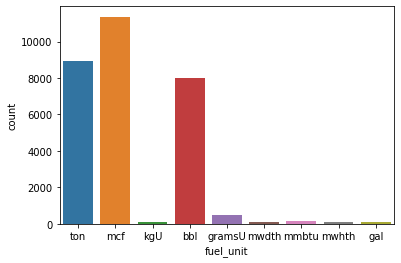

In [13]:
sns.countplot(x = 'fuel_unit', data = data)

In [14]:
len(data[(data['fuel_unit'] == 'ton') & (data['fuel_type_code_pudl'] == 'coal')]) 
#from the value gotten here, we can see that almost all the values with fuel_type_code_pudl=coal have fuel_unit=ton. so we can fill the missing values with 'ton' 

8438

In [15]:
len(data[(data['fuel_unit'] == 'mcf') & (data['fuel_type_code_pudl'] == 'gas')]) 
#from the value gotten here, we can see that almost all the values with fuel_type_code_pudl=coal have fuel_unit=ton. so we can fill the missing values with 'ton' 

11333

In [16]:
data['fuel_unit'].fillna(data['fuel_unit'].mode()[0], inplace = True) #used the mode to fill the missing values majorly because there are not so many missing values and the impact on the data wouldnt be so much.

In [17]:
data.duplicated().any()

False

# Question 2
For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

In [18]:
data['fuel_type_code_pudl'].value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

In [19]:
yr_94_coal = len(data[(data['fuel_type_code_pudl'] == 'coal') & (data['report_year']==1994)]) #This gets out the data with just fuel type of coal in 1994

In [20]:
yr_98_coal = len(data[(data['fuel_type_code_pudl'] == 'coal') & (data['report_year']==1998)]) #This gets out the data with just fuel type of coal in 1998

In [21]:
(yr_94_coal - yr_98_coal) / yr_98_coal * 100

10.208816705336426

## Question 3
Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

In [22]:
data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


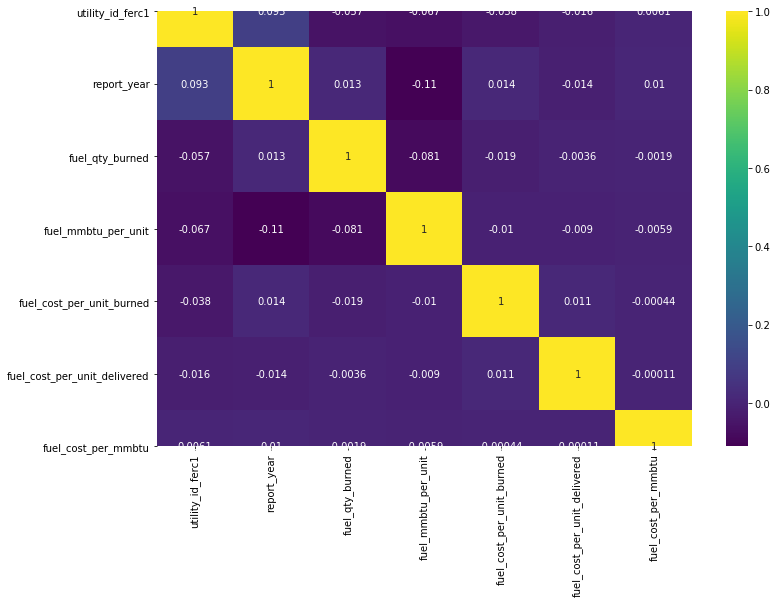

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)
#this correlation figure shows us that there are really no strongly correlated variables

In [24]:
-0.038 > -0.01

False

In [25]:
utility_id_ferc1 = -0.038 
fuel_qty_burned = -0.019

# Question 4
The feature with missing values falls under what category? What missing value imputation technique would you use?

### Solution
The feature with missing values fall under 'fuel_unit' category. I filled the missing values with mode ('mcf') because we have just 180 missing values which should not affect the dimension of the data and the 'mcf' value appears to be the most appropriate as the mean and median cannot work being non-numerical variables.

# Question 5

Which year has the highest average fuel cost per unit delivered?

In [26]:
data.head(10)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.77,2.77,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.24,43.25,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.77,0.00,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133.0,24.840000,58.54,55.13,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520.0,24.290000,33.97,34.65,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233.0,22.484000,28.73,28.11,1.278


In [27]:
data_year = data.groupby('report_year') #creating a grouped object by report_year
data_year['fuel_cost_per_unit_delivered'].mean() #used the grouped data to find the average fuel_cost_per_unit_delivered

report_year
1994       63.636060
1995       32.735269
1996     9196.705948
1997    11140.197239
1998      287.154420
1999       25.551627
2000      985.362877
2001       60.050396
2002       47.594361
2003       55.663493
2004      139.524275
2005       41.438184
2006       38.657484
2007       43.325023
2008       58.588197
2009      652.694163
2010       91.862105
2011       59.774667
2012       60.994502
2013      172.307591
2014      192.737183
2015      326.535511
2016      103.901761
2017       46.196861
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64

In [28]:
max(data_year['fuel_cost_per_unit_delivered'].mean()) #the year 1997 has the highest average fuel_cost_per_unit_delivered

11140.19723948813

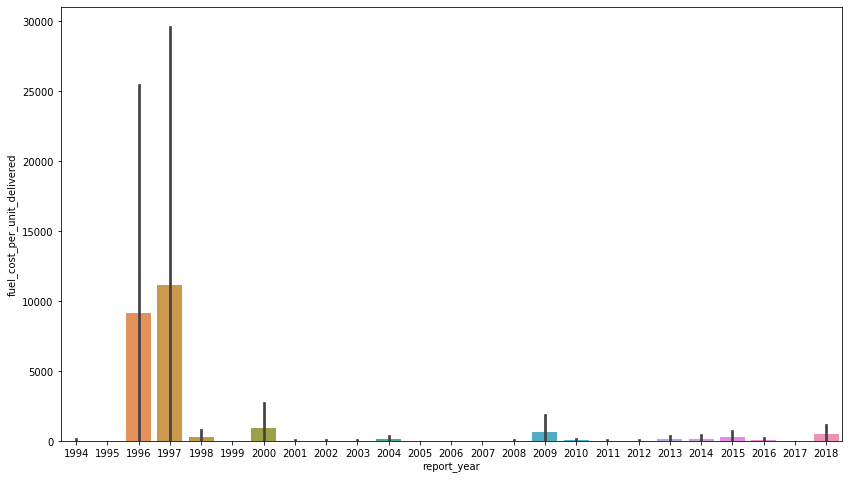

In [29]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'report_year', y = 'fuel_cost_per_unit_delivered', data = data);
#from the graph below, the year 1997 has the highest average fuel_cost_per_unit_delivered

# Question 6
Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places? 

(Enter answer in the format: Feature: xxx, Total: xxx, Percent: xxx)

In [30]:
total_num_of_rows = len(fuel_data['fuel_unit']) #the total number of rows in the data
total_num_of_rows

29523

In [31]:
num_of_miss_val = fuel_data['fuel_unit'].isnull().sum() #the total number of missing values in the data
num_of_miss_val

180

In [32]:
percent = (num_of_miss_val / total_num_of_rows) * 100 #the percentage of missing values
percent

0.609694136774718

### Answer
Feature: fuel_unit, Total: 29523, Percent: 0.610%

# Question 7
What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

In [33]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


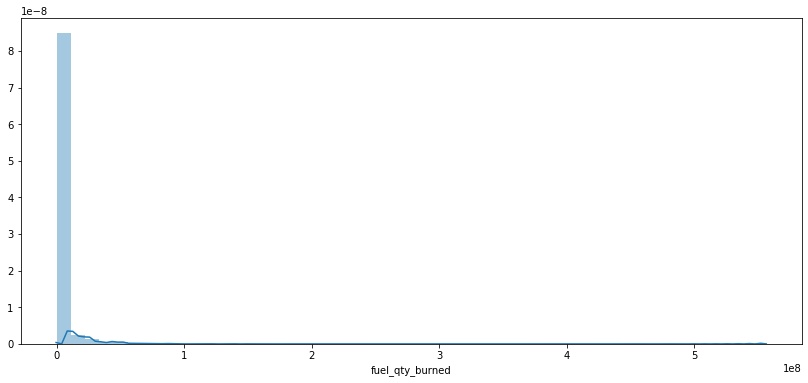

In [34]:
plt.figure(figsize=(14,6))
sns.distplot(data['fuel_qty_burned']) #from the value below we can see that the data is left skewed

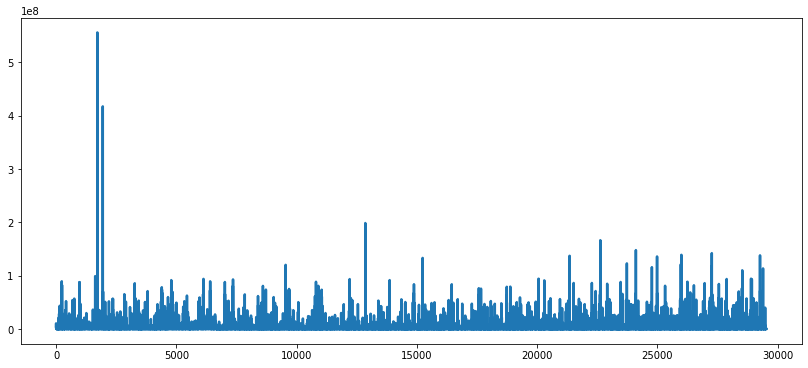

In [35]:
plt.figure(figsize=(14,6))
sns.lineplot(data = data['fuel_qty_burned'], linewidth=2.5);

# Question 8

What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

# Question 9

Which of the following fuel type code has the lowest average fuel cost per unit burned?

In [36]:
data_group1 = data.groupby('fuel_type_code_pudl') #grouped data by 'fuel_type_code_pudl'
data_group1.mean()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,
coal,115.637534,2004.623143,1.903473e+06,20.762780,67.421830,116.951141,1.787190
gas,124.122062,2005.978060,4.843183e+06,1.021913,13.659397,12.095172,5.408876
nuclear,107.397311,2002.970660,5.454838e+06,17.582120,4955.157002,28616.915039,1.716559
oil,113.236235,2007.195933,6.311677e+04,5.814377,168.877086,313.907691,12.698732
other,110.467066,2001.700599,2.948137e+06,0.572752,18.253856,16.871485,155.084910
waste,154.253968,2005.650794,1.171914e+05,0.341163,19.518122,18.413052,822.709937


In [37]:
data_group1['fuel_cost_per_unit_burned'].mean() #used the grouped data to calculate the mean of 'fuel_cost_per_unit_burned'

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

In [38]:
min(data_group1['fuel_cost_per_unit_burned'].mean()) #the gas fuel type has the lowest average fuel_cost_per_unit_burned

13.659396569737135

# Question 10
If you’re given two lists:

A = [1,2,3,4,5,6], B = [13, 21, 34]

The task is to create a list with the elements of A and B in a single dimension with output:

A_B =  [1,2,3,4,5,6,13, 21, 34]

Which of the following option is the best way to create this list?

In [39]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

# Visualisations

In [40]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


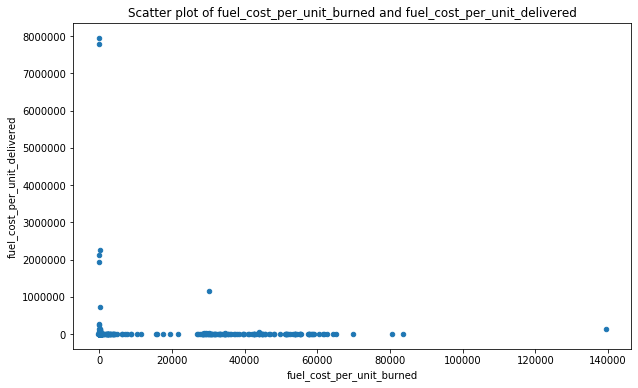

In [41]:
#a scatter plot can also be made from two numericals
data.plot.scatter(x = 'fuel_cost_per_unit_burned', y = 'fuel_cost_per_unit_delivered', 
                  title = 'Scatter plot of fuel_cost_per_unit_burned and fuel_cost_per_unit_delivered', 
                figsize = (10,6));